Data Review

In [1]:
import os
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
IMAGES_PATH = 'img/'

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure 00_available_obs


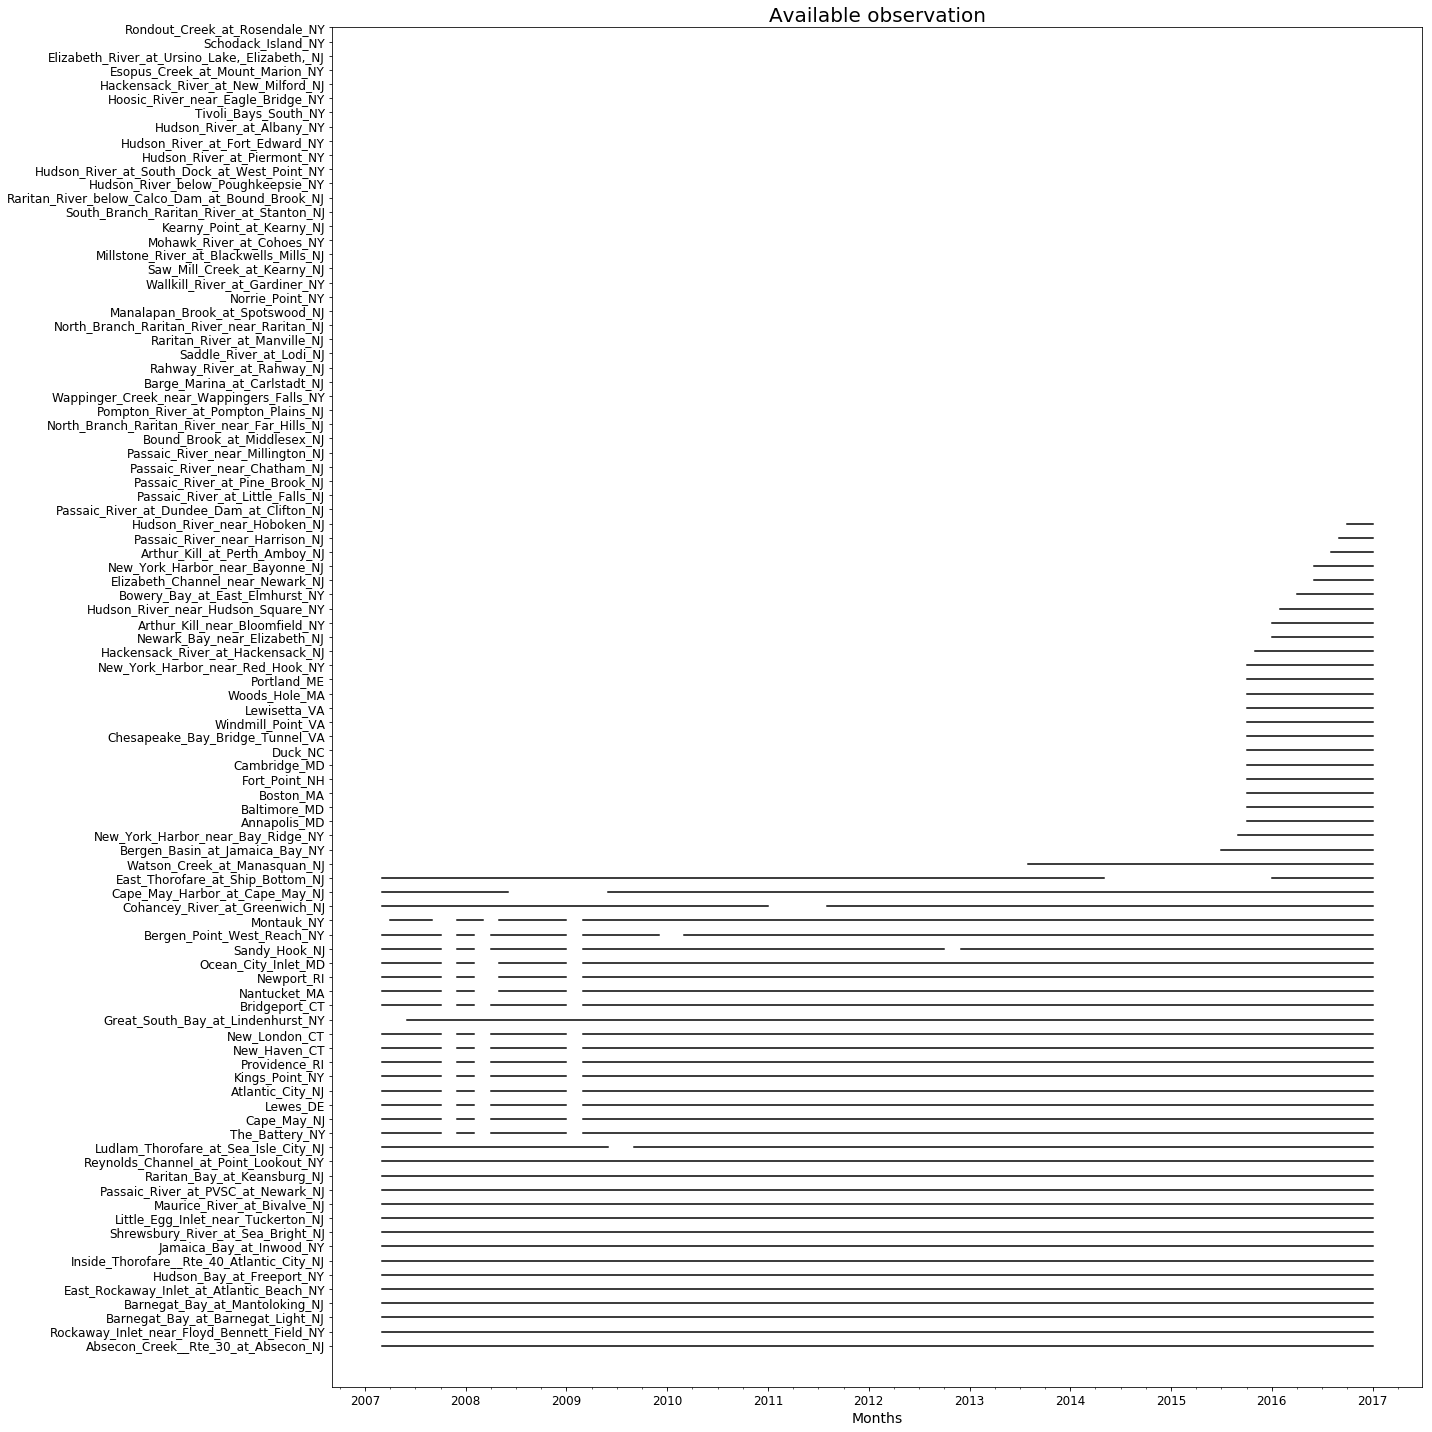

In [2]:
T = pd.read_csv('series/'+'obs_h'+'.csv',header=0,index_col=0,parse_dates=True)

TQ_bool = T.resample('M').count()>2
nstation = len(TQ_bool.columns)
TQ_bool_sum = TQ_bool.sum().sort_values(ascending=False)
TQ_bool = TQ_bool[TQ_bool_sum.index]
TQ = TQ_bool*np.arange(nstation)
TQ[~TQ_bool] = np.nan

ax = TQ.plot(legend=False,figsize=(20,20),yticks=range(nstation),color='k')
ax.set_yticklabels(list(TQ_bool_sum.index.values));
ax.set_xlabel('Months');
ax.set_title('Available observation',fontsize=20);
save_fig("00_available_obs");

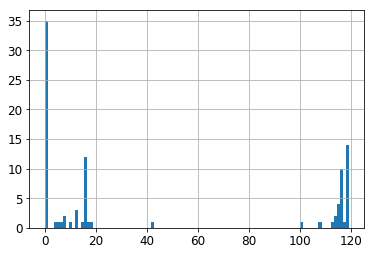

In [3]:
TQ_bool_sum.hist(bins=100);

In [4]:
select = TQ_bool_sum.index.values[TQ_bool_sum>105]
print('Station selected: ',len(TQ_bool[select].columns))

Station selected:  33


Saving figure 00a_available_selected_obs


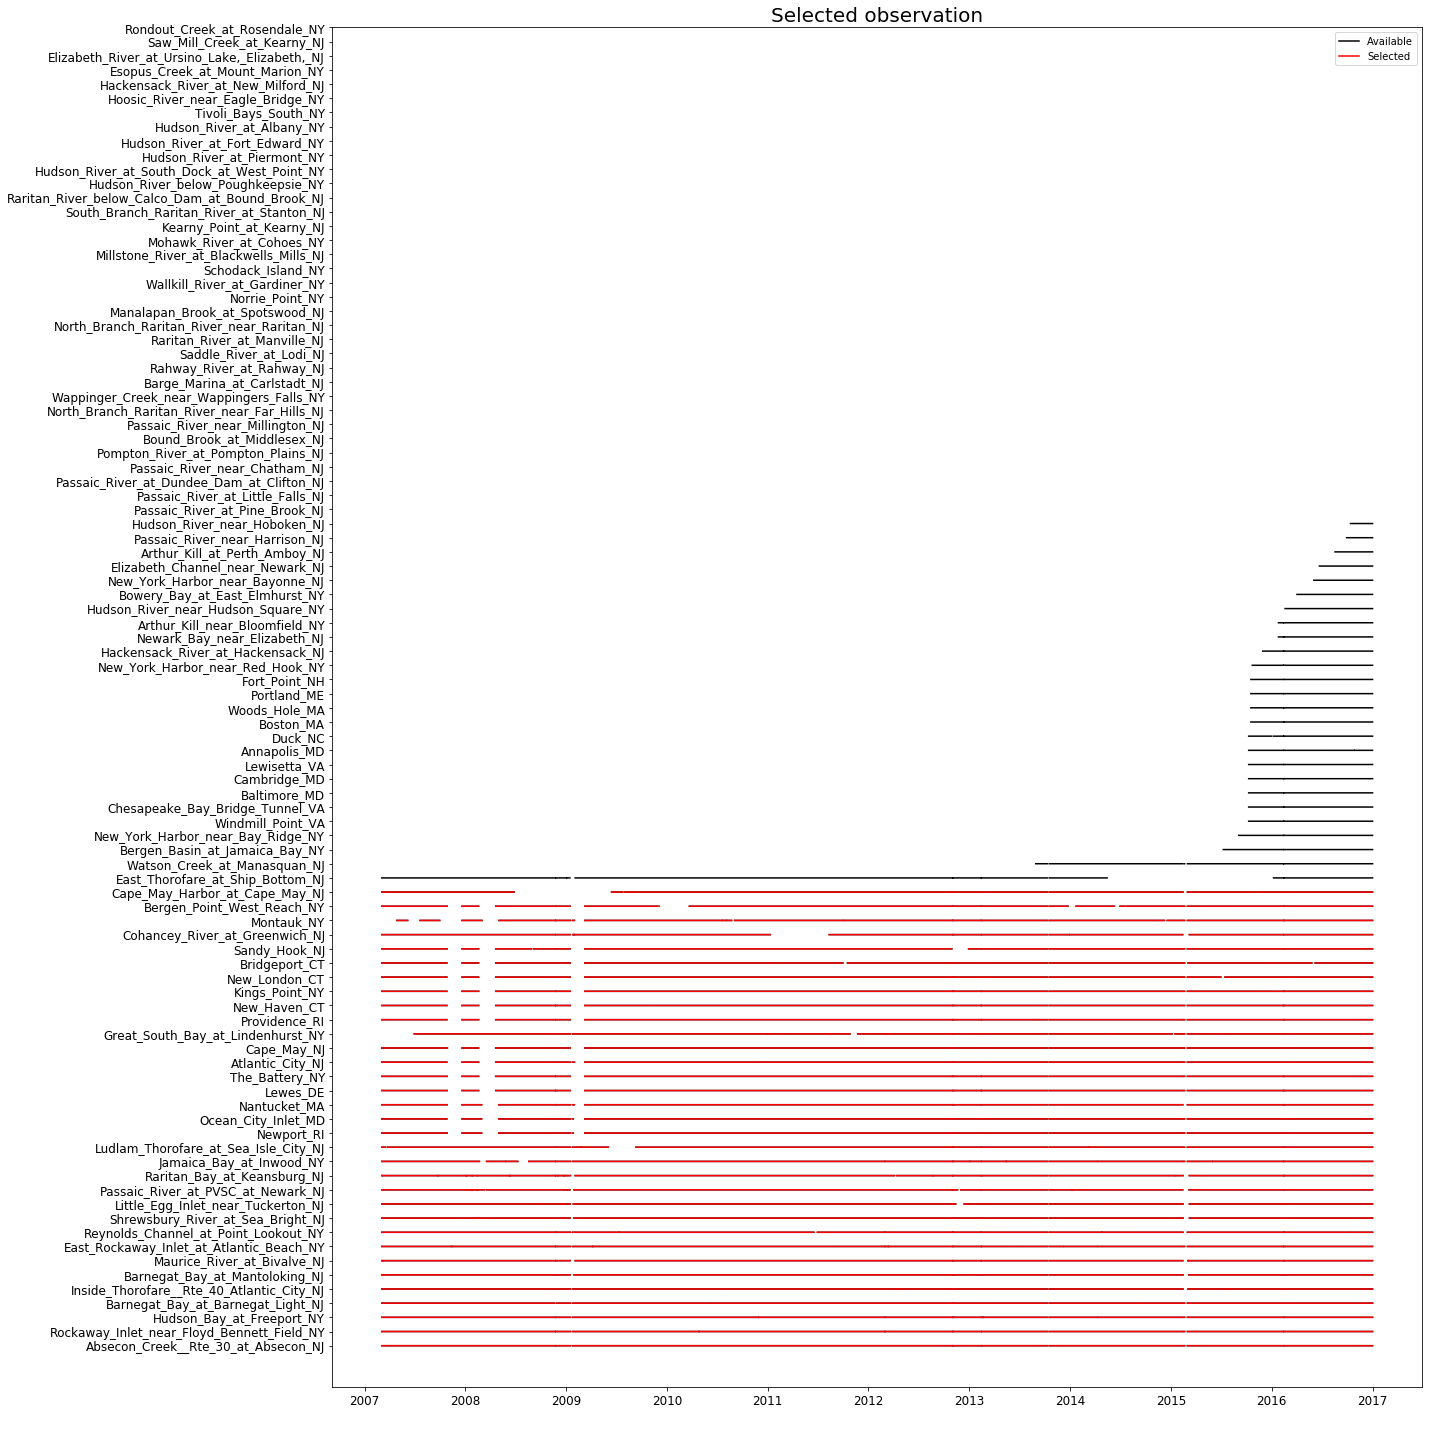

In [5]:
T = pd.read_csv('series/'+'obs_h'+'.csv',header=0,index_col=0,parse_dates=True)

TQ_bool = T.resample('D').count()>2
nstation = len(TQ_bool.columns)
TQ_bool_sum = TQ_bool.sum().sort_values(ascending=False)
TQ_bool = TQ_bool[TQ_bool_sum.index]
TQ = TQ_bool*np.arange(nstation)
TQ[~TQ_bool] = np.nan

stations = list(TQ.columns.values)
select_id = [stations.index(v) for v in select]

fig, ax = plt.subplots(figsize=(20,20))
for i in range(nstation):
    ax.plot(TQ.index.values,TQ.values[:,i],'k-',label='Available')
for i in select_id:
    ax.plot(TQ.index.values,TQ.values[:,i],'r-',label='Selected')
#ax = TQ.plot(legend=False,figsize=(20,20),yticks=range(nstation),color='k',label='Available')
ax.set_yticks(range(nstation))
ax.set_yticklabels(list(TQ_bool_sum.index.values));
ax.set_xlabel(' ');
ax.set_title('Selected observation',fontsize=20);

from collections import OrderedDict
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

save_fig("00a_available_selected_obs");

Saving figure 01_selected_obs


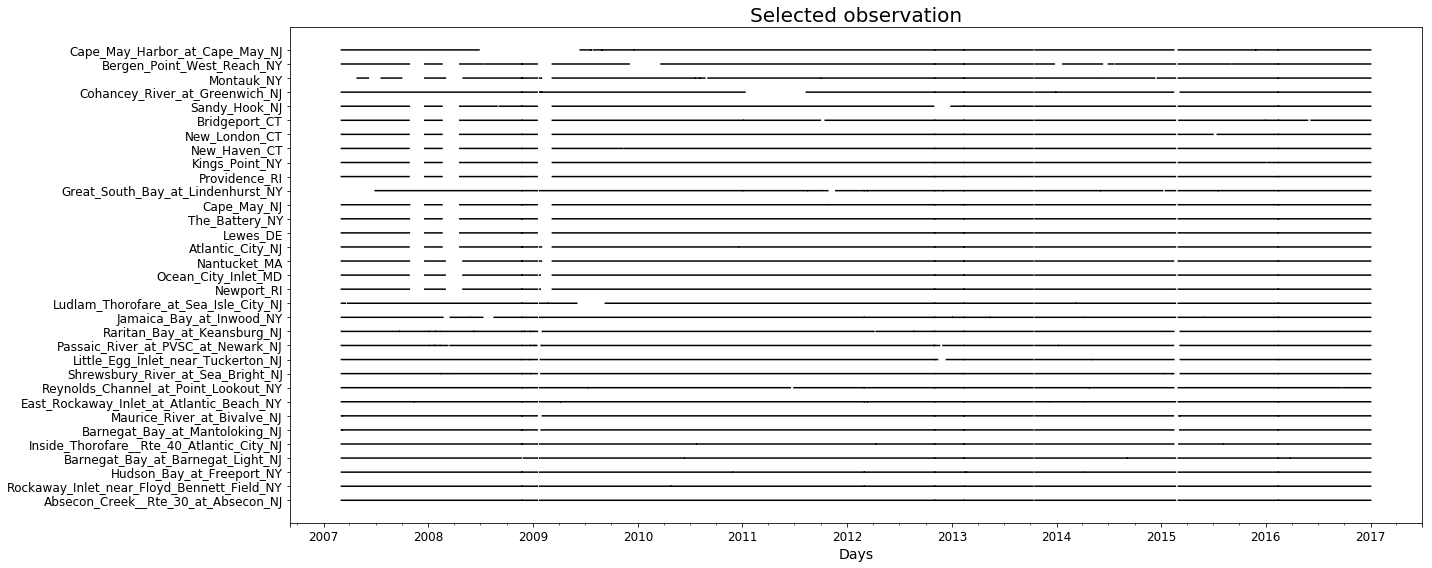

In [6]:
T = pd.read_csv('series/'+'obs_h'+'.csv',header=0,index_col=0,parse_dates=True)[select]

TQ_bool = T.resample('D').count()>2
nstation = len(TQ_bool.columns)
TQ_bool_sum = TQ_bool.sum().sort_values(ascending=False)
TQ_bool = TQ_bool[TQ_bool_sum.index]
TQ = TQ_bool*np.arange(nstation)
TQ[~TQ_bool] = np.nan

ax = TQ.plot(legend=False,figsize=(20,8),yticks=range(nstation),color='k')
ax.set_yticklabels(list(TQ_bool_sum.index.values));
ax.set_xlabel('Days');
ax.set_title('Selected observation',fontsize=20);
save_fig("01_selected_obs");

In [7]:
from parse_stations import get_stations
S = get_stations()
stations = [v.replace(' ','_') for v in S['station']]
select_id = [stations.index(v) for v in select]

In [8]:
lon = [float(v) for v in S['lon']]
lat = [float(v) for v in S['lat']]
lat_max = max(lat)
lat_min = min(lat)
lon_max = max(lon)
lon_min = min(lon)
lat_diff = lat_max-lat_min
lon_diff = lon_max-lon_min
margin = .05

Saving figure 02_map_obs_stations


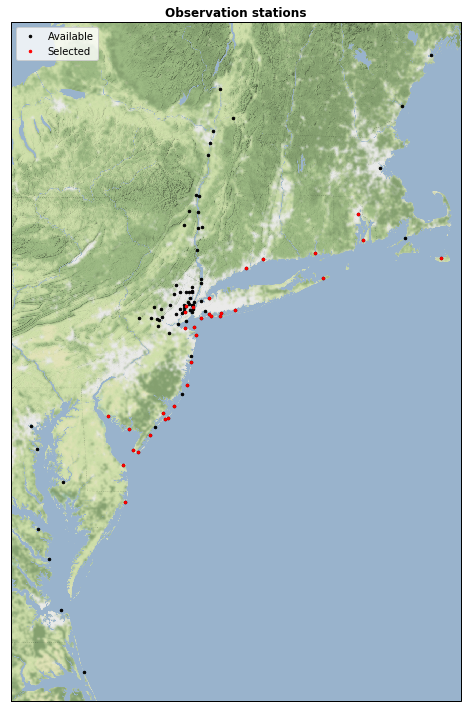

In [9]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
stamen_terrain = cimgt.StamenTerrain()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=stamen_terrain.crs)
ax.set_extent([lon_min-lon_diff*margin, lon_max+lon_diff*margin, lat_min-lat_diff*margin, lat_max+lat_diff*margin])
ax.add_image(stamen_terrain, 8)
plt.plot(lon,lat,'.',color='k',markersize=5,transform=ccrs.Geodetic(),label='Available');
plt.plot(np.take(lon,select_id),np.take(lat,select_id),'.',color='r',markersize=5,transform=ccrs.Geodetic(),label='Selected');
ax.set_title('Observation stations',fontweight='bold');
ax.legend();
save_fig("02_map_obs_stations");

For later use:

Saving figure 03_available_tid


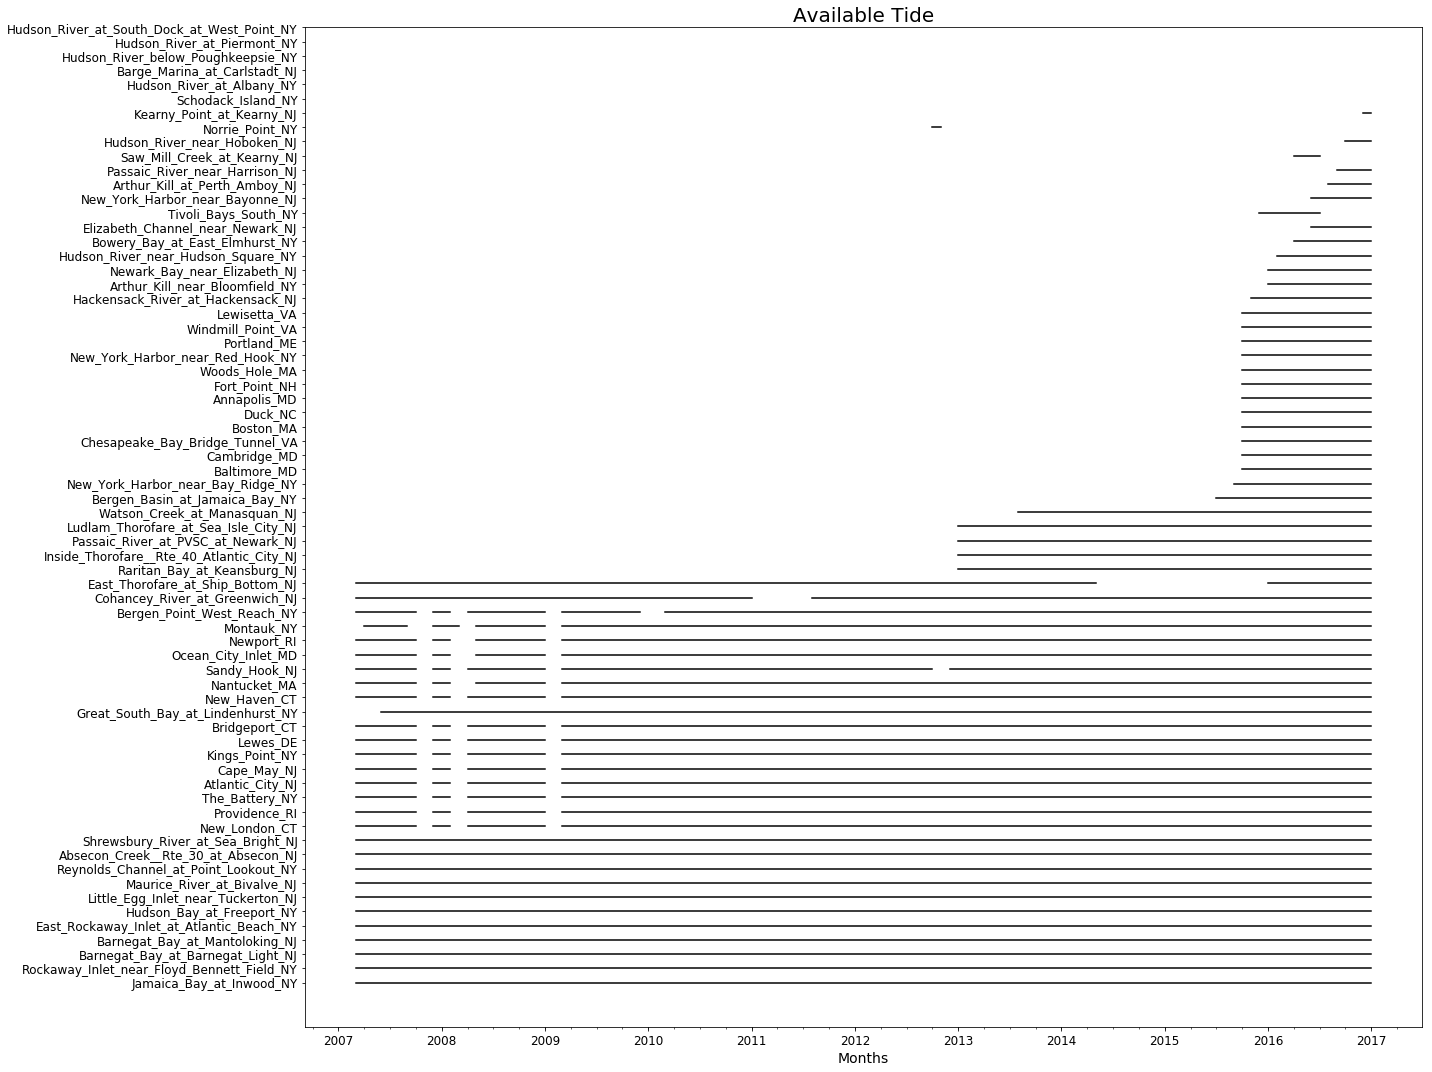

In [10]:
T = pd.read_csv('series/'+'tid_h'+'.csv',header=0,index_col=0,parse_dates=True)

TQ_bool = T.resample('M').count()>2
nstation = len(TQ_bool.columns)
TQ_bool_sum = TQ_bool.sum().sort_values(ascending=False)
TQ_bool = TQ_bool[TQ_bool_sum.index]
TQ = TQ_bool*np.arange(nstation)
TQ[~TQ_bool] = np.nan

ax = TQ.plot(legend=False,figsize=(20,15),yticks=range(nstation),color='k')
ax.set_yticklabels(list(TQ_bool_sum.index.values));
ax.set_xlabel('Months');
ax.set_title('Available Tide',fontsize=20);
save_fig("03_available_tid");

Saving figure 04_available_mod


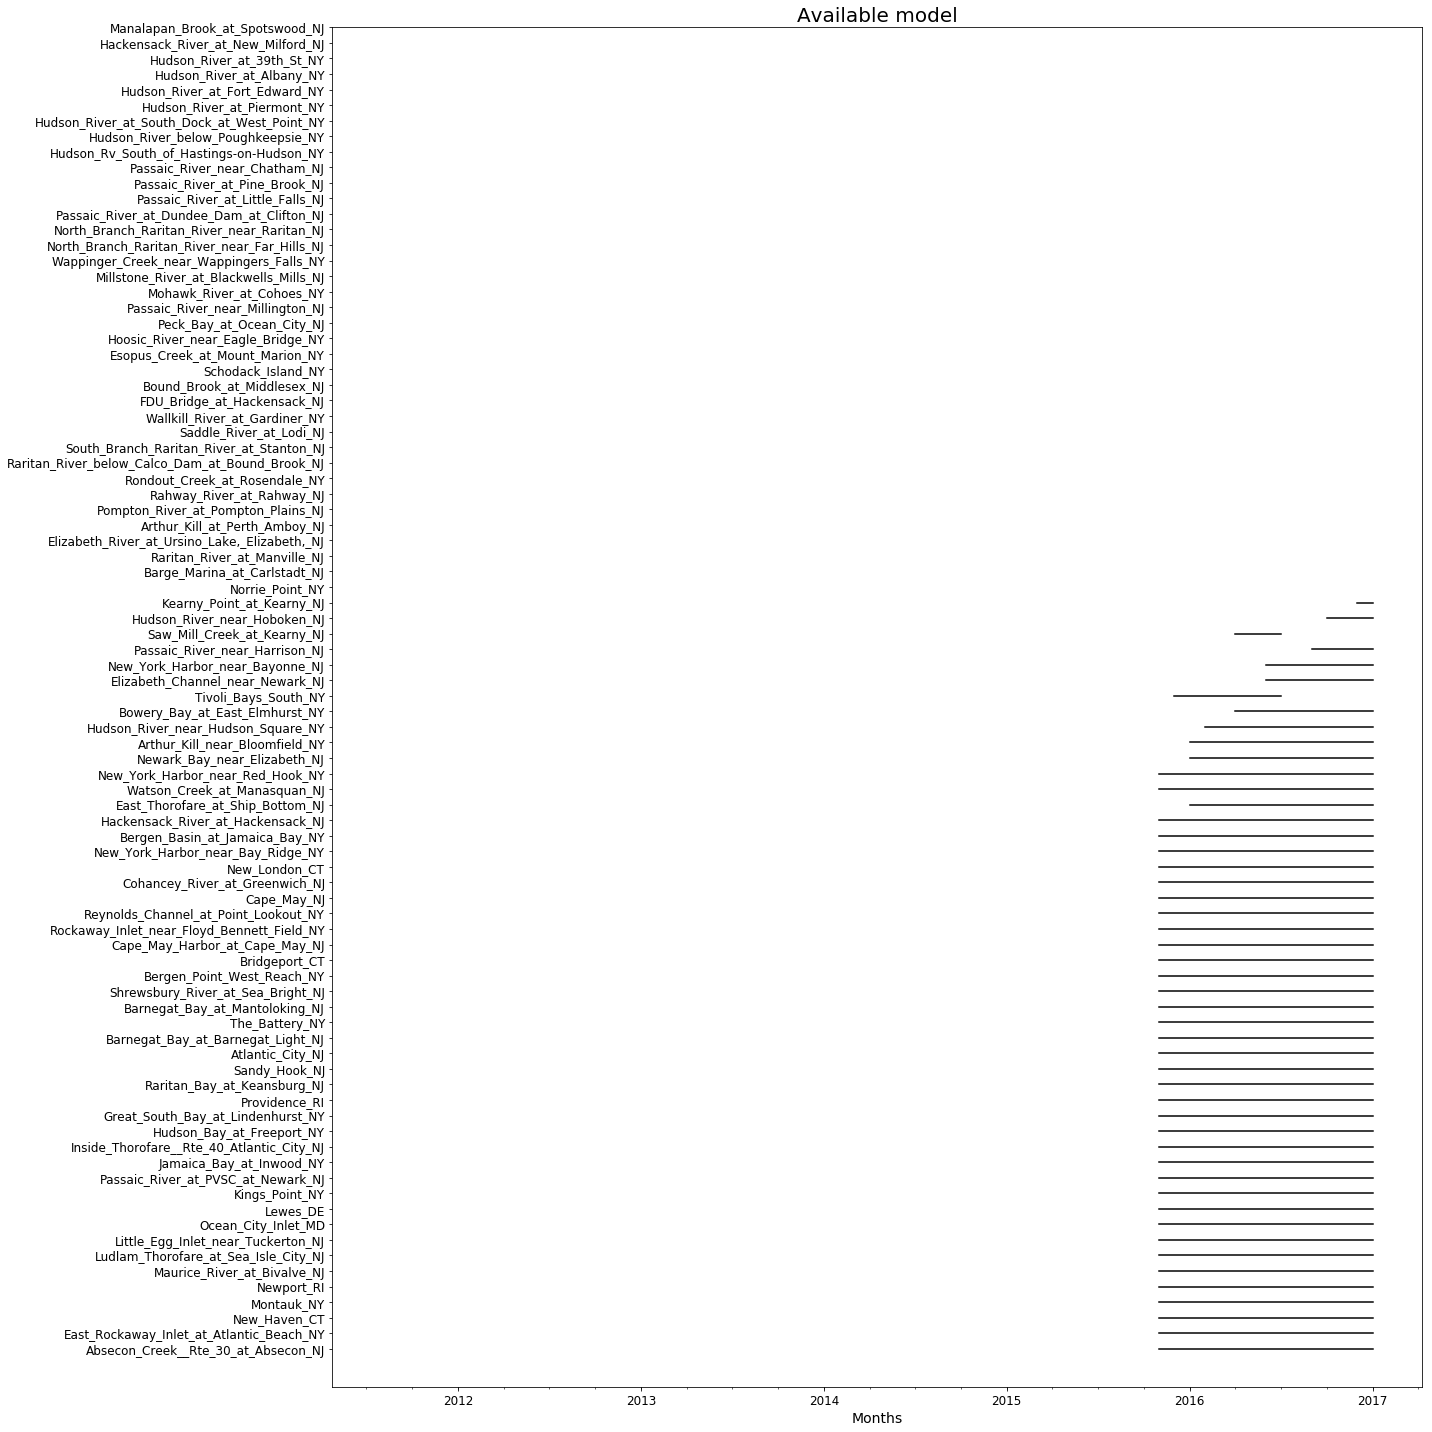

In [11]:
T = pd.read_csv('series/'+'mod_h'+'.csv',header=0,index_col=0,parse_dates=True)

TQ_bool = T.resample('M').count()>2
nstation = len(TQ_bool.columns)
TQ_bool_sum = TQ_bool.sum().sort_values(ascending=False)
TQ_bool = TQ_bool[TQ_bool_sum.index]
TQ = TQ_bool*np.arange(nstation)
TQ[~TQ_bool] = np.nan

ax = TQ.plot(legend=False,figsize=(20,20),yticks=range(nstation),color='k')
ax.set_yticklabels(list(TQ_bool_sum.index.values));
ax.set_xlabel('Months');
ax.set_title('Available model',fontsize=20);
save_fig("04_available_mod");

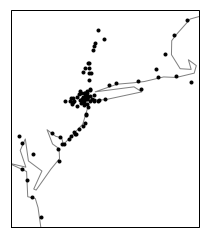

In [12]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color='grey');
ax.plot(lon,lat,'k.');